# Исследование гипотез для интернет-магазина

## Общие положения

**Заказчик** — отдел маркетинга крупного интернет-магазина

**Цель исследования** - приоритизировать гипотезы по увеличению выручки и отобрать наиболее перспективные по результатам анализа 

**Исходные данные** — файлы с данными по гипотезам, заказам и пользователям.

**Метрики, которые интересуют заказчика:**

1. Кумулятивная выручка
2. Кумулятивный средний чек
3. Относительное изменение среднего чека по группам
4. Кол-во заказов по пользователям

**Основные шаги:**

- Изучение данных и предобработка данных
- Приоритизация гипотез
- Анализ A/B-теста
- Формулировка выводов

### Описание данных

**Файл /datasets/hypothesis.csv**
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Файл /datasets/orders.csv**
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

**Файл /datasets/visitors.csv**
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Изучение и предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
#чтение файлов
try:
    df_hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    df_orders = pd.read_csv('/datasets/orders.csv')
    df_visitors = pd.read_csv('/datasets/visitors.csv')
except:
    df_hypothesis = pd.read_csv('C:/Users/au31894/Desktop/Программирование/Исходные данные/hypothesis.csv')
    df_orders = pd.read_csv('C:/Users/au31894/Desktop/Программирование/Исходные данные/orders.csv')
    df_visitors = pd.read_csv('C:/Users/au31894/Desktop/Программирование/Исходные данные/visitors.csv')
display(df_hypothesis.head())
display(df_orders.head())
display(df_visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [3]:
#перевод названий столбцов в нижний регистр
df_hypothesis.columns = df_hypothesis.columns.str.lower()
df_orders.columns = df_orders.columns.str.lower()
df_visitors.columns = df_visitors.columns.str.lower()
#изучение данных - проверка пропусков и типов данных
display(df_hypothesis.info())
display(df_orders.info())
display(df_visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
hypothesis    9 non-null object
reach         9 non-null int64
impact        9 non-null int64
confidence    9 non-null int64
efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null int64
visitorid        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

#### Комментарий
- Даты в некорректном формате object
- Пропуски отсутствуют

In [4]:
# замена типов данных у дат
df_orders['date'] = pd.to_datetime(df_orders['date'], format='%Y-%m-%d') 
df_visitors['date'] = pd.to_datetime(df_visitors['date'], format='%Y-%m-%d')


#проверка
display(df_orders.info())
display(df_visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionid    1197 non-null int64
visitorid        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

#### Комментарий
У столбцов дат тип данных преобразован в корректный формат

In [5]:
#просмотр уникальных значений
def unique_function(data):
    for col in data:
        print('Уникальные значения:', col)
        display(data[col].value_counts())

print('База гипотез')
unique_function(df_hypothesis)
print()
print('База заказов')
unique_function(df_orders)
print()
print('База пользователей')
unique_function(df_visitors)

#проверка дубликатов
print('Дубликаты гипотез:', df_hypothesis.duplicated().sum())
print('Дубликаты заказов:', df_orders.duplicated().sum())
print('Дубликаты пользователей:', df_visitors.duplicated().sum())

База гипотез
Уникальные значения: hypothesis


Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок                1
Запустить акцию, дающую скидку на товар в день рождения                                                         1
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию            1
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа    1
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар             1
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей              1
Запустить собственную службу доставки, что сократит срок доставки заказов                                       1
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей        

Уникальные значения: reach


3     3
8     2
10    1
5     1
2     1
1     1
Name: reach, dtype: int64

Уникальные значения: impact


3     3
10    1
9     1
7     1
5     1
2     1
1     1
Name: impact, dtype: int64

Уникальные значения: confidence


8    3
9    1
7    1
4    1
3    1
2    1
1    1
Name: confidence, dtype: int64

Уникальные значения: efforts


3     3
5     2
10    1
8     1
6     1
1     1
Name: efforts, dtype: int64


База заказов
Уникальные значения: transactionid


3574407166    1
2470658885    1
1476831880    1
3709669952    1
2764584088    1
             ..
1168756094    1
1185885568    1
11068804      1
486237576     1
1192185169    1
Name: transactionid, Length: 1197, dtype: int64

Уникальные значения: visitorid


4256040402    11
2458001652    11
2378935119     9
2038680547     8
3717692402     5
              ..
3254689071     1
4186744110     1
1455861274     1
3612778094     1
3149228032     1
Name: visitorid, Length: 1031, dtype: int64

Уникальные значения: date


2019-08-05    48
2019-08-14    47
2019-08-12    47
2019-08-06    46
2019-08-15    46
2019-08-28    45
2019-08-01    45
2019-08-27    44
2019-08-02    44
2019-08-19    43
2019-08-08    43
2019-08-29    42
2019-08-07    42
2019-08-26    41
2019-08-09    41
2019-08-22    41
2019-08-23    40
2019-08-03    40
2019-08-10    39
2019-08-16    38
2019-08-21    37
2019-08-30    35
2019-08-13    35
2019-08-04    33
2019-08-20    32
2019-08-31    32
2019-08-24    31
2019-08-11    26
2019-08-18    26
2019-08-17    24
2019-08-25    24
Name: date, dtype: int64

Уникальные значения: revenue


990      17
890      13
390      13
1490     10
1190     10
         ..
1139      1
25250     1
3180      1
10970     1
6145      1
Name: revenue, Length: 713, dtype: int64

Уникальные значения: group


B    640
A    557
Name: group, dtype: int64


База пользователей
Уникальные значения: date


2019-08-02    2
2019-08-05    2
2019-08-21    2
2019-08-15    2
2019-08-09    2
2019-08-03    2
2019-08-28    2
2019-08-22    2
2019-08-16    2
2019-08-10    2
2019-08-04    2
2019-08-29    2
2019-08-23    2
2019-08-17    2
2019-08-11    2
2019-08-30    2
2019-08-08    2
2019-08-24    2
2019-08-18    2
2019-08-12    2
2019-08-06    2
2019-08-31    2
2019-08-25    2
2019-08-19    2
2019-08-13    2
2019-08-07    2
2019-08-01    2
2019-08-26    2
2019-08-20    2
2019-08-14    2
2019-08-27    2
Name: date, dtype: int64

Уникальные значения: group


B    31
A    31
Name: group, dtype: int64

Уникальные значения: visitors


610    2
718    2
654    2
490    2
509    1
575    1
699    1
709    1
361    1
560    1
679    1
421    1
676    1
546    1
544    1
543    1
722    1
707    1
668    1
667    1
406    1
531    1
656    1
655    1
395    1
650    1
646    1
644    1
770    1
577    1
711    1
581    1
617    1
378    1
413    1
746    1
502    1
628    1
756    1
369    1
412    1
621    1
748    1
619    1
487    1
507    1
609    1
737    1
735    1
468    1
595    1
594    1
721    1
720    1
719    1
717    1
713    1
769    1
Name: visitors, dtype: int64

Дубликаты гипотез: 0
Дубликаты заказов: 0
Дубликаты пользователей: 0


#### Комментарий
- Дубликатов в файлах нет

### Вывод
1. Пропуски и дубликаты в данных отсутствуют
2. Форматы дат исправлены с object на datetime

## Приоритизация гипотез

In [6]:
#выведем список с названиями гипотез
pd.options.display.max_colwidth = 200
print(df_hypothesis['hypothesis'])
# приоритизация по методу ICE
df_hypothesis['ICE'] = (df_hypothesis['impact'] * df_hypothesis['confidence']) / df_hypothesis['efforts']
df_hypothesis['ICE'] = df_hypothesis['ICE'].round(1)
display('Сортировка по методу ICE:', df_hypothesis.sort_values(by = 'ICE', ascending = False))
# приоритизация по методу RICE
df_hypothesis['RICE'] = (df_hypothesis['reach'] * df_hypothesis['impact'] * df_hypothesis['confidence']) / df_hypothesis['efforts']
df_hypothesis['RICE'] = df_hypothesis['RICE'].round(1)
display('Сортировка по методу RICE:', df_hypothesis.sort_values(by = 'RICE', ascending = False))

0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                         Запустить акцию, дающую скидку

'Сортировка по методу ICE:'

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


'Сортировка по методу RICE:'

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


### Вывод
1. По методу ICE в топ 3 попали гипотезы №8(скидка в день рождения),0(новые каналы трафика) и 7(форма подписки), а наименее приоритетная - №4 - изменить цвет фона главной страницы
2. По методу RICE в топ 3 попали гипотезы №7, 2(блоки рекомендаций товаров) и 0, наименее приоритетная также №4
3. Различия в ТОП3 объясняются тем, что гипотеза 8 имеет самый низкий охват, т.е. кол-во пользователей с днем рождения в период акции небольшое, а у гипотезы №2 высокий охват (2ое место по охвату среди гипотез)

## Анализ A/B теста

### Кумулятивная выручка

In [30]:
# создаем массив уникальных пар значений дат и групп теста
df_date_group = df_orders[['date', 'group']].drop_duplicates() 
#агрегируем значения по заказам, вычислим максимальную дату, Найдём число уникальных ID заказов и пользователей, подсчитаем сумму средних чеков и применим к каждой строке
ordersAggregated = (df_date_group.apply(lambda x: df_orders
    [np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group']))
# сделаем все то же самое по клиентам
visitorsAggregated = df_date_group.apply(lambda x: df_visitors[np.logical_and(df_visitors['date'] <= x['date'], df_visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData['revenue_mRUB'] = cumulativeData['revenue'] / 1000000

print(cumulativeData.head(5))
df_orders.head()

        date group  orders  buyers  revenue  visitors  revenue_mRUB
0 2019-08-01     A      24      20   148579       719      0.148579
1 2019-08-01     B      21      20   101217       713      0.101217
2 2019-08-02     A      44      38   242401      1338      0.242401
3 2019-08-02     B      45      43   266748      1294      0.266748
4 2019-08-03     A      68      62   354874      1845      0.354874


,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


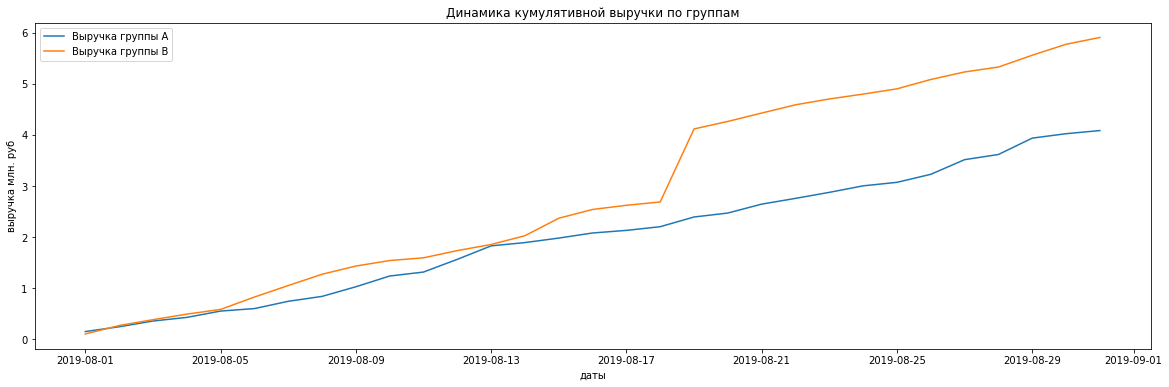

In [8]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue','revenue_mRUB', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue','revenue_mRUB', 'orders']]


fig, ax= plt.subplots(1,1,figsize=(20, 6))
x= cumulativeRevenueA['date']
y1 = cumulativeRevenueA['revenue_mRUB']
y2 = cumulativeRevenueB['revenue_mRUB']
ax.plot(x, y1, label = 'Выручка группы A')
ax.plot(x, y2, label = 'Выручка группы B')
ax.legend(loc='upper left')
ax.set_title('Динамика кумулятивной выручки по группам')
ax.set_xlabel('даты')
ax.set_ylabel('выручка млн. руб')
plt.show()

#### Комментарий
19.08. произошел аномальный рост кумулятивной выручки у группы B.

In [9]:
# делаем срезы по группам
orders_A = df_orders[df_orders['group'] == "A"]
orders_B = df_orders[df_orders['group'] == "B"]
# группируем доход по датам и доходу
orders_A_revenue_cum = orders_A.groupby('date').agg({'revenue': 'sum'})
orders_A_revenue_cum = orders_A_revenue_cum.reset_index()
orders_A_revenue_cum['revenue_mRUB'] = orders_A_revenue_cum['revenue'] / 1000000

orders_B_revenue_cum = orders_B.groupby('date').agg({'revenue': 'sum'})
orders_B_revenue_cum = orders_B_revenue_cum.reset_index()
orders_B_revenue_cum['revenue_mRUB'] = orders_B_revenue_cum['revenue'] / 1000000


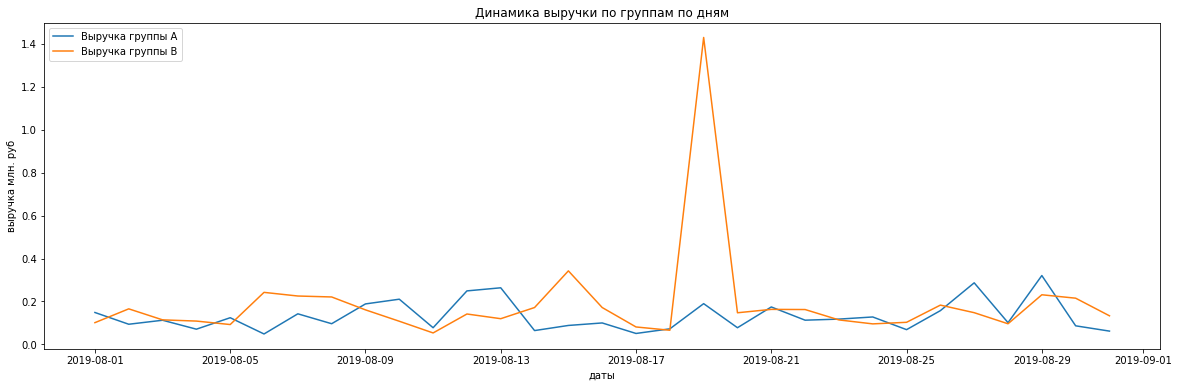

In [10]:
#строим график динамики кумулятивной выручки по группам
fig, ax= plt.subplots(1,1,figsize=(20, 6))
x= orders_A_revenue_cum['date']
y1 = orders_A_revenue_cum['revenue_mRUB']
y2 = orders_B_revenue_cum['revenue_mRUB']
ax.plot(x, y1, label = 'Выручка группы A')
ax.plot(x, y2, label = 'Выручка группы B')
ax.legend(loc='upper left')
ax.set_title('Динамика выручки по группам по дням')
ax.set_xlabel('даты')
ax.set_ylabel('выручка млн. руб')
plt.show()

#### Комментарий
Наблюдается аномальный всплеск выручки 19.08.2021 - более 1,4 млн. руб.

Вариантов несколько - либо увеличение кол-ва транзакций в этот день, либо один клиент с огромным заказом, либо технический сбой.

In [11]:
# описание данных
display(orders_A_revenue_cum['revenue_mRUB'].describe())
display(orders_B_revenue_cum['revenue_mRUB'].describe())

count    31.000000
mean      0.131768
std       0.072146
min       0.048484
25%       0.077602
50%       0.112473
75%       0.165762
max       0.320690
Name: revenue_mRUB, dtype: float64

count    31.000000
mean      0.190573
std       0.238001
min       0.053310
25%       0.105332
50%       0.147274
75%       0.177353
max       1.429920
Name: revenue_mRUB, dtype: float64

#### Комментарий
Средняя выручка по дням:
- Группа A - 132 тыс.
- Группа B - 190 тыс. (есть выброс)

Медианная выручка по дням:
- Группа A - 112 тыс.
- Группа B - 105 тыс.

### Кумулятивный средний чек по группам

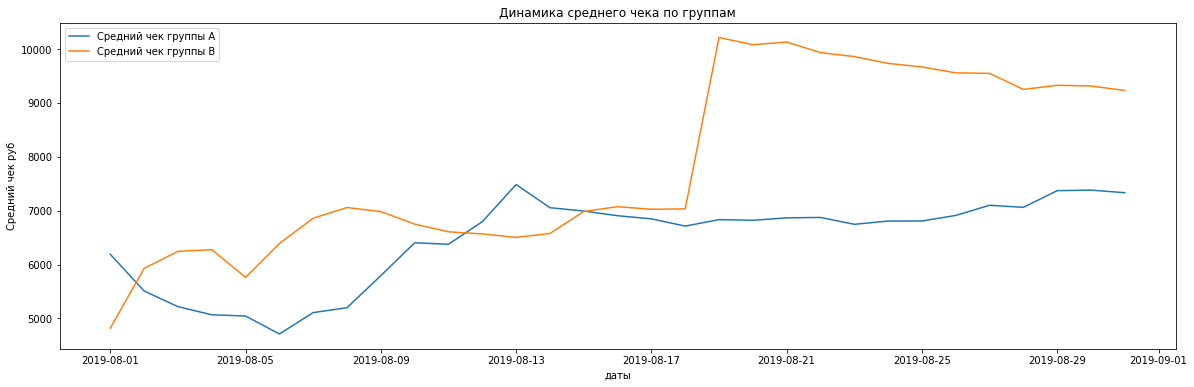

In [12]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA['avr_check'] = cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'] 

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB['avr_check'] = cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders']

#строим график динамики кумулятивного среднего чека по группам
fig, ax= plt.subplots(1,1,figsize=(20, 6))
x= cumulativeRevenueA['date']
y1 = cumulativeRevenueA['avr_check']
y2 = cumulativeRevenueB['avr_check']
ax.plot(x, y1, label = 'Средний чек группы A')
ax.plot(x, y2, label = 'Средний чек группы B')
ax.legend(loc='upper left')
ax.set_title('Динамика среднего чека по группам')
ax.set_xlabel('даты')
ax.set_ylabel('Средний чек руб')
plt.show()

#### Комментарий
Средний чек группы B показывает похожую динамику, что и кумулятивная выручка и растет c 19.08. По всей вероятности рост произошел из-за аномального заказа.

In [13]:
# группируем доход по датам и доходу и кол-ву транзкаций
orders_A_revenue_cum_check = orders_A.groupby('date').agg({'revenue': 'sum', 'transactionid' : 'count'})
orders_A_revenue_cum_check = orders_A_revenue_cum_check.reset_index()
orders_A_revenue_cum_check['avr_check'] = orders_A_revenue_cum_check['revenue'] / orders_A_revenue_cum_check['transactionid']

orders_B_revenue_cum_check = orders_B.groupby('date').agg({'revenue': 'sum', 'transactionid' : 'count'})
orders_B_revenue_cum = orders_B_revenue_cum_check.reset_index()
orders_B_revenue_cum_check['avr_check'] = orders_B_revenue_cum_check['revenue'] / orders_B_revenue_cum_check['transactionid']

display(orders_A_revenue_cum_check['avr_check'].describe())
display(orders_B_revenue_cum_check['avr_check'].describe())

count       31.000000
mean      7373.290980
std       3542.710105
min       2680.875000
25%       5027.410000
50%       6190.791667
75%       8569.107576
max      18831.285714
Name: avr_check, dtype: float64

count       31.000000
mean      9175.600077
std      11124.432585
min       3428.857143
25%       6061.823370
50%       7314.555556
75%       8619.785714
max      68091.428571
Name: avr_check, dtype: float64

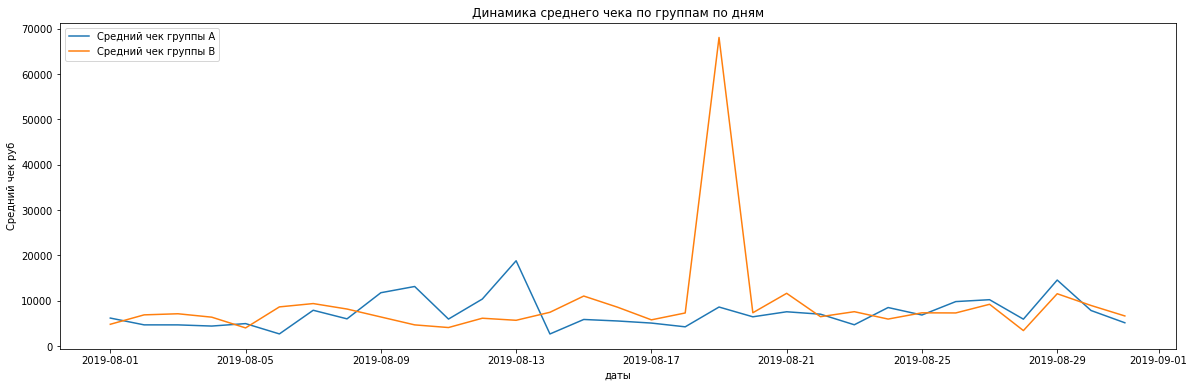

In [14]:
#строим график динамики кумулятивного среднего чека по группам
fig, ax= plt.subplots(1,1,figsize=(20, 6))
x= orders_A_revenue_cum_check['date']
y1 = orders_A_revenue_cum_check['avr_check']
y2 = orders_B_revenue_cum_check['avr_check']
ax.plot(x, y1, label = 'Средний чек группы A')
ax.plot(x, y2, label = 'Средний чек группы B')
ax.legend(loc='upper left')
ax.set_title('Динамика среднего чека по группам по дням')
ax.set_xlabel('даты')
ax.set_ylabel('Средний чек руб')
plt.show()

#### Комментарий
По-прежнему наблюдается всплеск 19.08.2019 - это означает, что дело не в наплыве пользователей (иначе всплеска среднего чека не было), а в крупном заказе или техническом сбое.

### Относительное изменение среднего чека

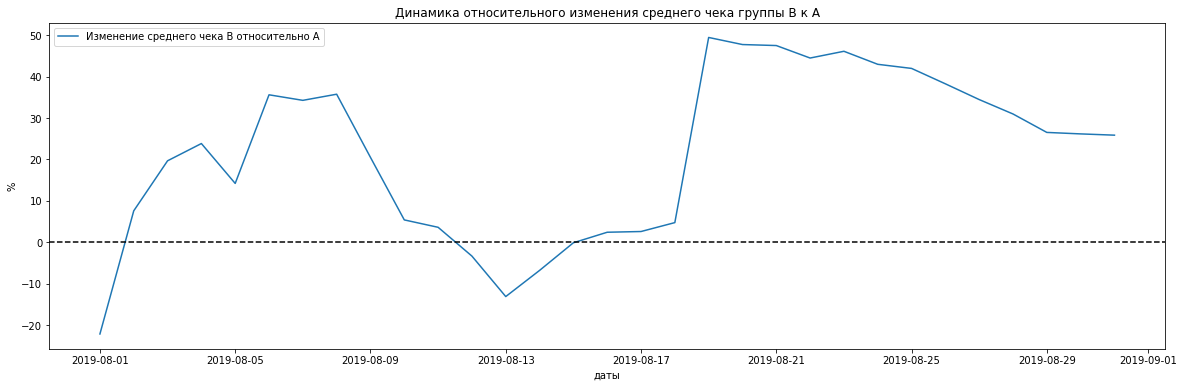

In [15]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
fig, ax= plt.subplots(1,1,figsize=(20, 6))
x= mergedCumulativeRevenue['date']
y1 = ((mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)*100
ax.plot(x, y1, label = 'Изменение среднего чека B относительно A')
ax.legend(loc='upper left')
ax.set_title('Динамика относительного изменения среднего чека группы B к A')
ax.set_xlabel('даты')
ax.set_ylabel('%')
ax.axhline(y=0, color='black', linestyle='--') 
plt.show()

#### Комментарий
- С 02-08 по 11-08 средний чек группы B превышал группу A в диапазоне 5-35%
- 12 - 13.08. упал относительно группы A на 10%
- 19.08. произошел аномальный рост среднего чека группы B и это отразилось на относительном изменении(на 50% к A). Далее средний чек группы B постепенно снижается.

### Кумулятивная конверсия

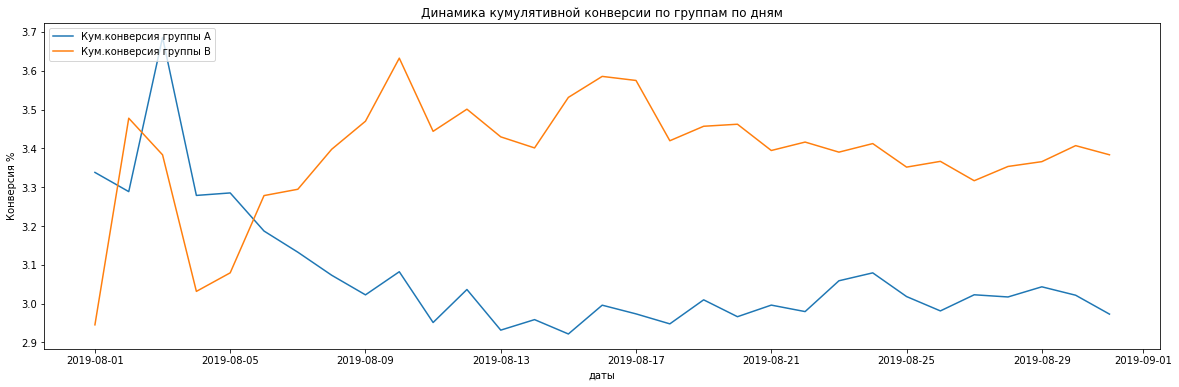

In [16]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#строим график динамики кумулятивной конверсии по группам
fig, ax= plt.subplots(1,1,figsize=(20, 6))
x1 = cumulativeDataA['date']
x2 = cumulativeDataB['date']
y1 = cumulativeDataA['conversion'] * 100
y2 = cumulativeDataB['conversion'] * 100
ax.plot(x1, y1, label = 'Кум.конверсия группы A')
ax.plot(x2, y2, label = 'Кум.конверсия группы B')
ax.legend(loc='upper left')
ax.set_title('Динамика кумулятивной конверсии по группам по дням')
ax.set_xlabel('даты')
ax.set_ylabel('Конверсия %')
plt.show()

#### Комментарий
Кумулятивная конверсия группы B превысила группу A с 06.08.2019 и далее оставалась выше. Колебания сохраняются

### Относительное изменение конверсии

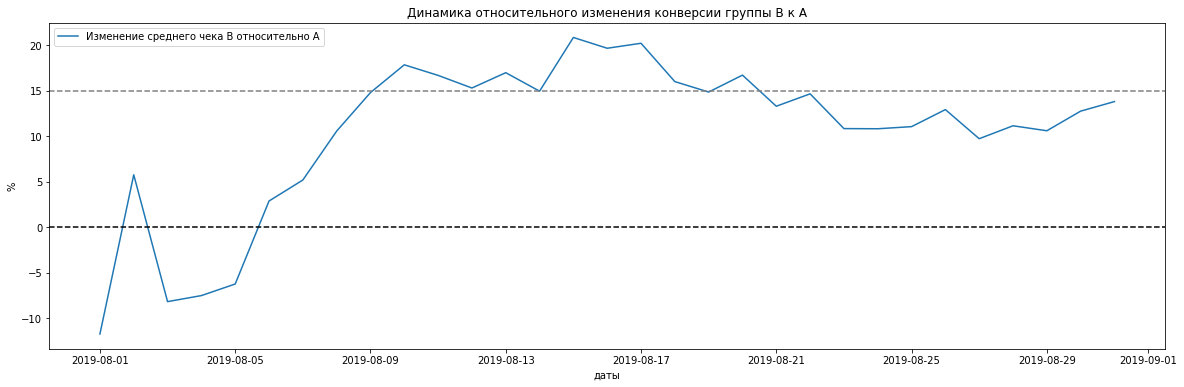

In [17]:
# собираем данные в одном датафрейме
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# cтроим отношение конверсий
fig, ax= plt.subplots(1,1,figsize=(20, 6))
x= mergedCumulativeConversions['date']
y1 = ((mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)*100)
ax.plot(x, y1, label = 'Изменение среднего чека B относительно A')
ax.legend(loc='upper left')
ax.set_title('Динамика относительного изменения конверсии группы B к A')
ax.set_xlabel('даты')
ax.set_ylabel('%')
ax.axhline(y=0, color='black', linestyle='--') 
ax.axhline(y=15, color='grey', linestyle='--') 
plt.show()

#### Комментарий
- 02.08.2019 произошел рост относительного изменения конверсии - +5% группа B к группе A
- 03-05.08.2019 группа A была ниже группы B, далее показатель конверсии группы A рос до +20% 15.08., затем постепенно снижался, и к концу теста стал около +15% относительно группы A

### Кол-во заказов по пользователям

In [18]:
# подсчитаем количество заказов по пользователям
ordersByUsers = (
    df_orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

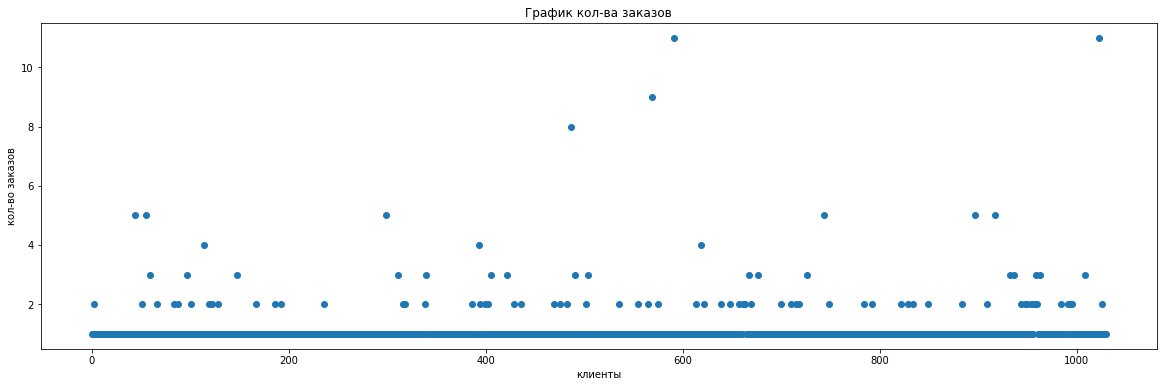

In [19]:
# строим точечный график кол-ва заказов
x_values = pd.Series(range(0,len(ordersByUsers)))
fig, ax= plt.subplots(1,1,figsize=(20, 6))
x= x_values
y1 = ordersByUsers['orders']
ax.scatter(x, y1)
ax.set_title('График кол-ва заказов')
ax.set_xlabel('клиенты')
ax.set_ylabel('кол-во заказов')
plt.show()

#### Комментарий
Большинство клиентов заказывали 1 раз, но есть много пользователей с 2 заказами

In [20]:
# считаем 95 и 99 перцентили
print(np.percentile(ordersByUsers['orders'], [95, 99])) 
orders_percentile_95 = np.percentile(ordersByUsers['orders'], [95])
orders_percentile_95 = orders_percentile_95.astype('int').tolist()
orders_percentile_95 = orders_percentile_95[0]
print(orders_percentile_95)

[2. 4.]
2


#### Комментарии
Не более 5% пользователей заказывали более 2х раз и не более 1% пользователей заказывали более 4х раз.

Остановимся на 2х заказах как нижней границы для отсечения аномальных пользователей.

### Стоимость заказов

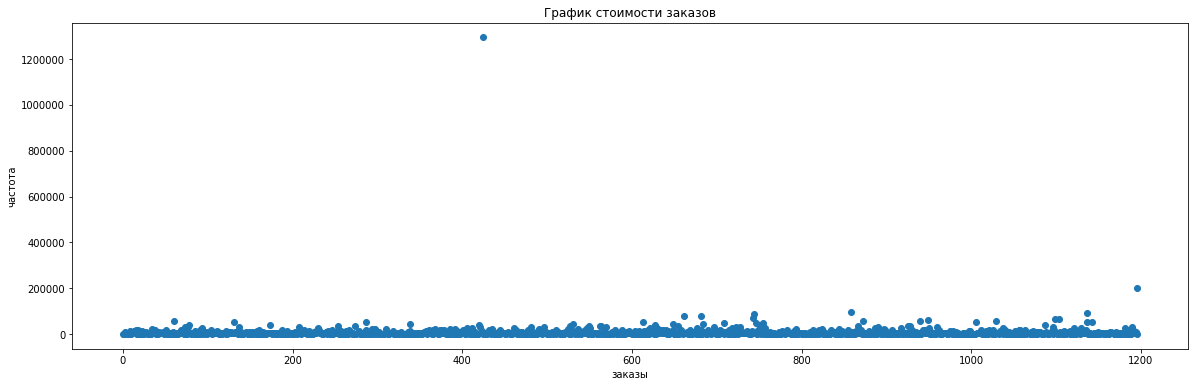

In [21]:
#построим гистограмму распределения по стоимостей заказов
x_values = pd.Series(range(0,len(df_orders['revenue'])))
fig, ax= plt.subplots(1,1,figsize=(20, 6))
x= x_values
y1 = df_orders['revenue']
ax.scatter(x, y1)
ax.set_title('График стоимости заказов')
ax.set_xlabel('заказы')
ax.set_ylabel('частота')
plt.show()

#### Комментарий
Большинство заказов лежит в диапазоне до 100 тыс. руб. Есть аномальный заказ, который мы выявили ранее на 1,4 млн.

In [22]:
# считаем 95 и 99 перцентили
print(np.percentile(df_orders['revenue'], [95, 99])) 
revenue_percentile_95 = np.percentile(df_orders['revenue'], [95])
revenue_percentile_95 = revenue_percentile_95.astype('int').tolist()
revenue_percentile_95 = revenue_percentile_95[0]
print(revenue_percentile_95)

[28000.  58233.2]
28000


#### Комментарии
Не более 5% заказов стоимостью более 28 тыс. руб. и не более 1% стоимостью более 58 тыс. руб.

Остановимся на 28 тыс. как нижней границы для отсечения аномальных пользователей.

### Статистическая значимость на "сырых" данных по конверсии и среднему чеку

In [23]:
# подготовим таблицу с датами и кол-ву пользователей
visitorsADaily = df_visitors[df_visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = df_visitors[df_visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# расчет кумулятивного кол-ва пользователей
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateA': 'sum'}),axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateB': 'sum'}),axis=1,)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [24]:
# подготовим таблицу с датами и заказам
ordersADaily = (df_orders[df_orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']].groupby('date', as_index=False).agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg({'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}),axis=1,).sort_values(by=['date'])
ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA']

ordersBDaily = (df_orders[df_orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']].groupby('date', as_index=False).agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg({'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}),axis=1,).sort_values(by=['date'])
ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB']
#объединяем все таблицы в одну
data = (ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left').merge(ordersACummulative, left_on='date', right_on='date', how='left').merge(ordersBCummulative, left_on='date', right_on='date', how='left').merge(visitorsADaily, left_on='date', right_on='date', how='left').merge(visitorsBDaily, left_on='date', right_on='date', how='left').merge(visitorsACummulative, left_on='date', right_on='date', how='left').merge(visitorsBCummulative, left_on='date', right_on='date', how='left'))

display(data.head(5)) 


,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


#### Описание столбцов data

- date — дата;
- ordersPerDateA — количество заказов в выбранную дату в группе A;
- revenuePerDateA — суммарная выручка в выбранную дату в группе A;
- ordersPerDateB — количество заказов в выбранную дату в группе B;
- revenuePerDateB — суммарная выручка в выбранную дату в группе B;
- ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
- revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
- ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
- revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
- visitorsPerDateA — количество пользователей в выбранную дату в группе A;
- visitorsPerDateB — количество пользователей в выбранную дату в группе B;
- visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A;
- visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

#### Формулировки гипотез
**Проверка нормальности распределений:**
- Нулевая гипотеза - распределение в выборках нормальное

- Альтернативная гипотеза - распределение в выборках не нормальное

**Проверка различий в выборках:**

*Конверсия*
- Нулевая гипотеза - результаты по конверсии по группам A и B случайны и на самом деле наблюдаемые различия случайны.

- Альтернативная гипотеза - результаты по конверсии по группам A и B действительно отличаются

*Средний чек*
- Нулевая гипотеза - результаты по среднему чеку по группам A и B случайны и на самом деле наблюдаемые различия случайны.

- Альтернативная гипотеза - результаты по среднему чеку по группам A и B действительно отличаются

In [25]:
#сформируем таблицы по пользователям с как минимум 1 заказом
ordersByUsersA = (
    df_orders[df_orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    df_orders[df_orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']
#создадим списки с кол-вом записей по заказам по группам
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
#проверим выборки на нормальность распределения
alpha = 0.05
results1 = stats.shapiro(sampleA)
p_value1 = results1[1]
print('p-значение тест Шапиро-Уилка по выборке A: ', p_value1)

if p_value1 < alpha:
    print('Отвергаем нулевую гипотезу по выборке A: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу по выборке A:, всё нормально') 
    
alpha = 0.05
results2 = stats.shapiro(sampleB)
p_value2 = results1[1]
print('p-значение тест Шапиро-Уилка по выборке B: ', p_value2)

if p_value2 < alpha:
    print('Отвергаем нулевую гипотезу по выборке B: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу по выборке B:, всё нормально') 

# печатаем p-value - вероятность, получить имеющиеся различия в выборке при условии, что нулевая гипотеза об их отсутствии в генеральной совокупности верна
print("p-value конверсии: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative='two-sided')[1]))
# относительное различие конверсии
print("относительное различие конверсий: {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

# p-value и относительное различие по среднему чеку
print('p-value средние чеки:{0:.3f}'.format(stats.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], df_orders[df_orders['group']=='B']['revenue'], alternative='two-sided')[1]))
print('относительное различие средних чеков:{0:.3f}'.format(df_orders[df_orders['group']=='B']['revenue'].mean()/df_orders[df_orders['group']=='A']['revenue'].mean()-1)) 

p-значение тест Шапиро-Уилка по выборке A:  0.0
Отвергаем нулевую гипотезу по выборке A: распределение не нормально
p-значение тест Шапиро-Уилка по выборке B:  0.0
Отвергаем нулевую гипотезу по выборке B: распределение не нормально
p-value конверсии: 0.017
относительное различие конверсий: 0.138
p-value средние чеки:0.729
относительное различие средних чеков:0.259


In [26]:
sampleA.head()

0    1
1    1
2    1
3    1
4    1
Name: orders, dtype: int64

#### Обоснование выбора статистического метода

- Так как распределение выборок ненормальное, использование параметрических методов оценки значимости некорректно.
- Целесообразно выбрать непараметрический тест Манна-Уитни для определения сдвига и различий в данных выборок
- Уровень статистистической значимости alfa выбран 0.05, а не 0.01, т.к. это позволяет снизить ошибку второго рода, когда неверно принимается нулевая гипотеза. Ошибки второго рода опаснее, т.к. можно пропустить критичные изменения и последствия от бездействия будут серьезнее, чем расход ресурсов на реализацию ложной альтернативной гипотезы притом, что вероятность такой случайной ошибки составляет всего 5%.

#### Комментарий


**Конверсия**
- p-value < 0,05 - нулевую гипотезу можно отвергнуть, т.е. вероятнее всего различия в генеральной совокупности действительно есть
- конверсия группы B по сырым данным больше группы A на 13,8%

**Средние чеки**
- p-value > 0,05 - нулевую гипотезу не отвергаем, полученные различия могут быть случайны и отсутствовать в генеральной совокупности
- средний чек группы B по сырым данным больше группы A на 25,9%

### Статистическая значимость на "очищенных" данных по среднему чеку

In [27]:
#вычленим пользователей с аномальным кол-вом заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_percentile_95]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_percentile_95]['userId'],
    ],
    axis=0,
)
#вычленим аномально дорогие заказы
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > revenue_percentile_95]['visitorid']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(74,)


In [28]:
#посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('p-value конверсии:{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative='two-sided')[1]))
print('относительное различие конверсий:{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value конверсии:0.013
относительное различие конверсий:0.173


#### Комментарий
- p-value практически без изменений, нулевую гипотезу можно отвергнуть, т.е. вероятнее всего различия в генеральной совокупности действительно есть
- отностилеьная конверсия группы B к группе A с 13,8% до 17,3%

In [29]:
print('p-value среднего чека:''{0:.3f}'.format(stats.mannwhitneyu(
            df_orders[
                np.logical_and(
                    df_orders['group'] == 'A',
                    np.logical_not(df_orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            df_orders[
                np.logical_and(
                    df_orders['group'] == 'B',
                    np.logical_not(df_orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'], alternative='two-sided'
        )[1]
    )
)

print('относительное различие среднего чека:'
    "{0:.3f}".format(
        df_orders[
            np.logical_and(
                df_orders['group'] == 'B',
                np.logical_not(df_orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / df_orders[
            np.logical_and(
                df_orders['group'] == 'A',
                np.logical_not(df_orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value среднего чека:0.738
относительное различие среднего чека:-0.020


#### Комментарий
- p-value стала немного выше, нулевую гипотезу по прежнему не отвергаем, полученные различия могут быть случайны и отсутствовать в генеральной совокупности
- средний чек группы B по сырым данным значительно изменился и стал на 2% меньше группы A (по сырым данным был на 25% больше)

## Выводы и заключение
1. В данных есть аномалии - заказ от 19.08. на 1,4 млн. руб. Необходимо определить это сбой или крупный клиент.

2. Данная аномалия искажает картину по кумулятивной конверсии и среднему чеку выводя группу теста B вперед.

3. 95% клиентов имеют не более 2х заказов с суммами заказов не более 28 тыс. руб. Заказы выше данных ограничений были отнесены к необычным и отсеивались при анализе очищенных данных.

4. В ходе оценки статистической значимости в конверсии и на сырых, и на очищенных данных нулевая гипотеза была отвергнута, т.е. различия вероятнее всего существуют (alpha = 0.05), относительное различие составило 13,8% на сырых данных и 17,3% очищенных. **Таким образом, по конверсии статистически значимое различие есть.**

5. В ходе оценки статистической значимости в среднем чеке и на сырых, и на очищенных данных нулевая гипотеза была принята, т.е. различия могут быть случайны и отсутствовать в генеральной совокупности (alpha = 0.05), относительное различие составило 26% на сырых данных и -2% на очищенных. **Таким образом, по среднему чеку статистически значимого различия не установлено.**

6. График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения в районе +15%

7. График различия среднего чека колеблется - есть серьезные аномалии. Сделать из этого графика определённые выводы нельзя.


**Заключение**

1. Целесообразно остановить *данный* тест, признать группу B победившей с точки зрения конверсии, что подтвердилось оценкой статистической значимости, 
2. Но по среднему чеку статистически значимые различия не подтвердились для него необходимо тестирование других гипотез.